Enter Keyword:love
Enter how many tweets to search: 100
How people are reacting on love by analyzing 100 tweets.

General Report: 
Positive

Detailed Report: 
85.00% people thought it was positive
8.00% people thought it was negative
7.00% people thought it was neutral


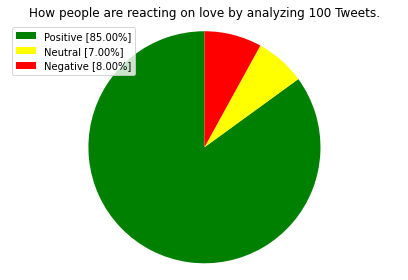

In [1]:
import sys,tweepy,csv,re
from textblob import TextBlob
import matplotlib.pyplot as plt


class SentimentAnalysis:

    def __init__(self):
        self.tweets = []
        self.tweetText = []

    def DownloadData(self):
        
        consumerKey = 'PLnHN8MwWtfhWmaNo8BhNb6jm'
        consumerSecret = 'bVpyWESaSr9cYc2XbSg1avvDmbpQRkOE2Ld1DQHGRpcnXpvGn8'
        accessToken = '1320575821862481922-QxZRvXy8ba2gfWvKDKFWsSthPIdTDw'
        accessTokenSecret = 'Vqq4AjnG3aZQQlZnj8AklhSAiBfyyIAQMqHr5vAubnOWC'
        auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
        auth.set_access_token(accessToken, accessTokenSecret)
        api = tweepy.API(auth)

        
        searchTerm = input("Enter Keyword:")
        NoOfTerms = int(input("Enter how many tweets to search: "))

        
        self.tweets = tweepy.Cursor(api.search, q=searchTerm, lang = "en").items(NoOfTerms)

        
        csvFile = open('result.csv', 'a')

        
        csvWriter = csv.writer(csvFile)


        
        polarity = 0
        positive = 0
        negative = 0
        neutral = 0


        
        for tweet in self.tweets:
            
            self.tweetText.append(self.cleanTweet(tweet.text).encode('utf-8'))
            
            analysis = TextBlob(tweet.text)
            
            polarity += analysis.sentiment.polarity  

            if (analysis.sentiment.polarity == 0):  
                neutral += 1
            elif (analysis.sentiment.polarity > 0 and analysis.sentiment.polarity <= 1):
                positive += 1
            elif (analysis.sentiment.polarity > -1 and analysis.sentiment.polarity <= 0):
                negative += 1


        
        csvWriter.writerow(self.tweetText)
        csvFile.close()

        
        positive = self.percentage(positive, NoOfTerms)
        negative = self.percentage(negative, NoOfTerms)
        neutral = self.percentage(neutral, NoOfTerms)

        
        polarity = polarity / NoOfTerms

        
        print("How people are reacting on " + searchTerm + " by analyzing " + str(NoOfTerms) + " tweets.")
        print()
        print("General Report: ")

        if (polarity == 0):
            print("Neutral")
        elif (polarity > 0 and polarity <= 1):
            print("Positive")
        elif (polarity > -1 and polarity <= 0):
            print("Negative")

        print()
        print("Detailed Report: ")
        print(str(positive) + "% people thought it was positive")
        print(str(negative) + "% people thought it was negative")
        print(str(neutral) + "% people thought it was neutral")

        self.plotPieChart(positive, negative, neutral, searchTerm, NoOfTerms)


    def cleanTweet(self, tweet):
       
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) | (\w +:\ / \ / \S +)", " ", tweet).split())

    
    def percentage(self, part, whole):
        temp = 100 * float(part) / float(whole)
        return format(temp, '.2f')

    def plotPieChart(self, positive,negative, neutral, searchTerm, noOfSearchTerms):
        labels = ['Positive [' + str(positive) + '%]', 'Neutral [' + str(neutral) + '%]','Negative [' + str(negative) + '%]']
        sizes = [positive, neutral, negative]
        colors = ['green','yellow', 'red']
        patches, texts = plt.pie(sizes, colors=colors, startangle=90)
        plt.legend(patches, labels, loc="best")
        plt.title('How people are reacting on ' + searchTerm + ' by analyzing ' + str(noOfSearchTerms) + ' Tweets.')
        plt.axis('equal')
        plt.tight_layout()
        plt.show()



if __name__== "__main__":
    sa = SentimentAnalysis()
    sa.DownloadData()